<a href="https://colab.research.google.com/github/hyounghe0724/StartPytorch/blob/main/ConvolutionNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import trange # for문의 진행 상황을 bar 형태로 출력

In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
cd/content/gdrive/My Drive/GoogleColab/deeplearningbrov2/pytorch

/content/gdrive/My Drive/GoogleColab/deeplearningbrov2/pytorch


In [27]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)
trainset = datasets.CIFAR10(root="./data", train = True, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testset = datasets.CIFAR10(root="./data", train=True, download=True, transform= transform)
testloader = DataLoader(testset, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [29]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5) # 채널 수 3, 출력 채널 6, 필커 크기 55 stride 1
    self.pool1 = nn.MaxPool2d(2,2) # 2x2
    self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5) # 채널 수 3, 출력 채널 6, 필커 크기 55 stride 1
    self.pool2 = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120,10)

  def forward(self, x):
    x = self.pool1(F.relu(self.conv1(x)))
    x = self.pool2(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 *5)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)

    return x

In [30]:
net = CNN().to(device)
print(net)

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)


In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-2, momentum=0.9)


In [34]:
loss_ =[]
n = len(trainloader)
num_epochs = 10
pbar = trange(num_epochs)

for epoch in pbar:

  running_loss = 0.0
  for data in trainloader:
    inputs, labels = data[0].to(device), data[1].to(device)
    optimizer.zero_grad(0)

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  l = running_loss/n
  loss_.append(l)
  pbar.set_postfix({'epoch':epoch+1, "loss" : 1})

100%|██████████| 10/10 [05:10<00:00, 31.09s/it, epoch=10, loss=1]


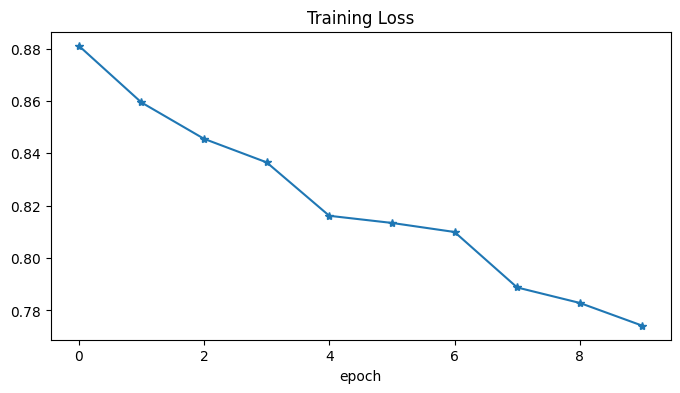

In [35]:
plt.figure(figsize=(8,4))
plt.plot(loss_, "-*")
plt.title("Training Loss")
plt.xlabel("epoch")
plt.show()

In [36]:
# 모델 저장하기
PATH = "./models/cifar_net.pth"
torch.save(net.state_dict(), PATH)

In [37]:
net = CNN().to(device)
net.load_state_dict(torch.load(PATH))


<ipython-input-37-e74b0791fa8a>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(PATH))


<All keys matched successfully>